<a href="https://colab.research.google.com/github/aayush1607/Detection-of-Offensive-Language-on-Social-Media/blob/main/Copy_of_Detection_of_Offensive_Language_on_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After wrangling

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [23]:
pwd

'/content'

In [24]:
df_scraped = pd.read_csv('./labeled_tweets.csv')
df_public = pd.read_csv('./public_data_labeled.csv')

In [25]:
df_scraped.drop_duplicates(inplace = True)
df_scraped.drop('id', axis = 'columns', inplace = True)

df_public.drop_duplicates(inplace = True)

In [26]:
df_scraped.head(2)

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...


In [27]:
df_public.head(2)

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [28]:
df = pd.concat([df_scraped, df_public])

In [29]:
df.shape

(35787, 2)

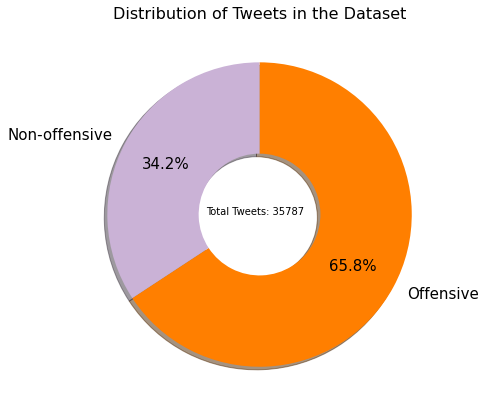

In [30]:
plt.figure(figsize = (7,7))
sorted_counts = df['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [31]:
df['label'] = df.label.map({'Offensive': 1, 'Non-offensive': 0})

Implementing a training and predicting Pipeline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], 
                                                    df['label'], 
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 35787
Number of rows in the training set: 26840
Number of rows in the test set: 8947


Vectorize the data

In [ ]:
# deep learning
from sklearn.preprocessing import LabelEncoder
X = df.full_text
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [88]:
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [87]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.constraints import maxnorm

tweets = list(df['full_text'])
labels= list(df['label'])
print(labels)
# Feature extraction

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# integer encode the documents
sequences = tokenizer.texts_to_sequences(tweets)

# pad documents to a max length of 14 words
maxlen = 14
X = pad_sequences(sequences, maxlen=maxlen)

print(X.shape)
y = to_categorical(labels, 2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Prepare hyperparameters of RNN
vocab_size = len(word_index)+1
output_dim = 32

# SimpleRNN
warnings.filterwarnings("ignore")
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = output_dim, input_length = maxlen))
model.add(SimpleRNN(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(output_dim))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
warnings.filterwarnings("ignore")

model.summary()



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [89]:
import time
start = time.time()

# Fit the model to the training set
rnn_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")

end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))


Epoch 1/10
 40/548 [=>............................] - ETA: 32s - loss: 0.6693 - accuracy: 0.6242

KeyboardInterrupt: ignored

In [54]:
# Save the RNN model
model.save('srnn.h5')


In [55]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 14, 32)            1535008   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 14, 32)            2080      
                                                                 
 dropout_3 (Dropout)         (None, 14, 32)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 14, 32)            2080      
                                                                 
 dropout_4 (Dropout)         (None, 14, 32)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                

In [63]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = output_dim, input_length = maxlen))
model.add(LSTM(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(output_dim, kernel_constraint=maxnorm(3)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
warnings.filterwarnings("ignore")


In [64]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 14, 32)            1535008   
                                                                 
 lstm_6 (LSTM)               (None, 14, 32)            8320      
                                                                 
 dropout_9 (Dropout)         (None, 14, 32)            0         
                                                                 
 lstm_7 (LSTM)               (None, 14, 32)            8320      
                                                                 
 dropout_10 (Dropout)        (None, 14, 32)            0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 2)                

In [65]:
start = time.time()

# Fit the model to the training set
lstm_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3)
# Final evaluation of the model
warnings.filterwarnings("ignore")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")
end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))


Epoch 1/10
548/548 [==============================] - 22s 26ms/step - loss: 0.3433 - accuracy: 0.8359 - val_loss: 0.2629 - val_accuracy: 0.8865
Epoch 2/10
548/548 [==============================] - 12s 21ms/step - loss: 0.1558 - accuracy: 0.9398 - val_loss: 0.2832 - val_accuracy: 0.8800
Epoch 3/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0759 - accuracy: 0.9720 - val_loss: 0.3542 - val_accuracy: 0.8709
Epoch 4/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0439 - accuracy: 0.9852 - val_loss: 0.4495 - val_accuracy: 0.8701
Epoch 5/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.5211 - val_accuracy: 0.8656
Epoch 6/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.5745 - val_accuracy: 0.8659
Epoch 7/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.7412 - val_accuracy:

In [67]:
# Save the LSTM model
model.save('lstm.h5')

In [71]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,f1_score,classification_report
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

True positive =  10528
False positive =  1728
False negative =  1057
True negative =  22474




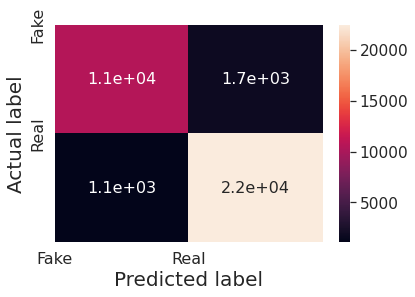

f1 score (RNN) : 0.9416546204931598 

Classification report : 
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     12256
           1       0.93      0.96      0.94     23531

    accuracy                           0.92     35787
   macro avg       0.92      0.91      0.91     35787
weighted avg       0.92      0.92      0.92     35787



In [77]:
from tensorflow import keras
rnn_model = keras.models.load_model('./srnn.h5')

print_confusion_matrix(labels, np.argmax(rnn_model.predict(X),axis=-1))
f1 = f1_score(labels, np.argmax(rnn_model.predict(X),axis=-1))
cr = classification_report(labels, np.argmax(rnn_model.predict(X),axis = -1))
print(f'f1 score (RNN) : {f1} \n')
print(f'Classification report : \n{cr}')


True positive =  10845
False positive =  1411
False negative =  1187
True negative =  22344




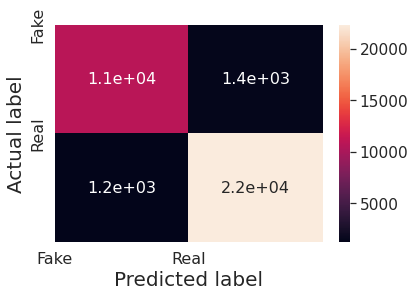

f1 score (LSTM) : 0.9450577337901281 

Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12256
           1       0.94      0.95      0.95     23531

    accuracy                           0.93     35787
   macro avg       0.92      0.92      0.92     35787
weighted avg       0.93      0.93      0.93     35787



In [76]:
from tensorflow import keras
lstm_model = keras.models.load_model('./lstm.h5')

print_confusion_matrix(labels, np.argmax(lstm_model.predict(X),axis=-1))
f1 = f1_score(labels, np.argmax(lstm_model.predict(X),axis=-1))
cr = classification_report(labels, np.argmax(lstm_model.predict(X),axis = -1))
print(f'f1 score (LSTM) : {f1} \n')
print(f'Classification report : \n{cr}')

In [38]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)


AttributeError: ignored

Implement Pipeline:

In [ ]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

Put Algorithms in Pipeline:

In [ ]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# deep leanring
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

max_words = 1000
max_len = 150

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
# deep lkearning
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',metrics=['accuracy'])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
# deep learning
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)



In [ ]:
# deep learning
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,)
# callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]


Epoch 1/10
191/191 [==============================] - 8s 42ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
191/191 [==============================] - 7s 39ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
191/191 [==============================] - 7s 39ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
191/191 [==============================] - 7s 39ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
191/191 [==============================] - 8s 40ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
191/191 [==============================] - 7s 38ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
191/191 [==============================] - 7s 38ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
191/191 [=====================

In [ ]:
# deep learning

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


In [ ]:
# deep learning

accr = model.evaluate(test_sequences_matrix,Y_test)


168/168 [==============================] - 2s 13ms/step - loss: nan - accuracy: 1.0000


In [ ]:
# deep learning
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: nan
  Accuracy: 1.000


In [ ]:
# make a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier()]

In [ ]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 4.75 sec
----------------------------------------------------
Training LinearSVC
Training LinearSVC finished in 0.55 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 1.53 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 53.80 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 34.06 sec
----------------------------------------------------
Training LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training LogisticRegression finished in 1.58 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.08 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------


In [ ]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)


Analyze the results of the Pipeline

In [ ]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,BaggingClassifier,0.928579,0.965867,0.923980,0.944459,0.249335,0.989270,0.997080,0.986573,0.991799,34.060349
1,SGDClassifier,0.926903,0.961661,0.925680,0.943328,0.002533,0.982414,0.992207,0.980964,0.986553,0.084919
2,LogisticRegression,0.926344,0.964089,0.922279,0.942721,0.002684,0.978726,0.990241,0.977282,0.983719,1.575584
3,DecisionTreeClassifier,0.922320,0.951891,0.928741,0.940174,0.024476,0.998845,0.999943,0.998300,0.999121,4.749083
4,LinearSVC,0.916732,0.946599,0.925510,0.935936,0.002273,0.997019,0.998298,0.997167,0.997733,0.554805
5,RandomForestClassifier,0.915502,0.944483,0.925850,0.935074,5.813395,0.998808,0.999546,0.998640,0.999093,53.801490
6,AdaBoostClassifier,0.907567,0.972508,0.884354,0.926338,0.375836,0.909650,0.971744,0.888448,0.928231,1.534878
7,MultinomialNB,0.893372,0.901663,0.940306,0.920579,0.004867,0.944560,0.956763,0.959039,0.957900,0.014439
8,KNeighborsClassifier,0.857606,0.895161,0.887245,0.891186,24.111055,0.897727,0.927596,0.915982,0.921753,0.003251


In [ ]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.857606,0.895161,0.884354,0.891186,0.002273,0.897727,0.927596,0.888448,0.921753,0.003251
max,0.928579,0.972508,0.940306,0.944459,24.111055,0.998845,0.999943,0.998640,0.999121,53.801490


In [ ]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]


In [ ]:
print('--------------------------------------------------------------------')
print('best_acc: ', best_acc)
print('--------------------------------------------------------------------')
print('best_f1: ', best_f1)
print('--------------------------------------------------------------------')
print('best_precision: ', best_precision)
print('--------------------------------------------------------------------')
print('best_recall: ', best_recall)
print('--------------------------------------------------------------------')


--------------------------------------------------------------------
best_acc:             Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
5  BaggingClassifier        0.928579         0.965867       0.92398   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
5        0.944459         0.249335          0.98927           0.99708   

   Recall: Train  F1 Score: Train  Training Time  
5       0.986573         0.991799      34.060349  
--------------------------------------------------------------------
best_f1:             Algorithm  Accuracy: Test  Precision: Test  Recall: Test  \
5  BaggingClassifier        0.928579         0.965867       0.92398   

   F1 Score: Test  Prediction Time  Accuracy: Train  Precision: Train  \
5        0.944459         0.249335          0.98927           0.99708   

   Recall: Train  F1 Score: Train  Training Time  
5       0.986573         0.991799      34.060349  
---------------------------------------------------------